In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import talib

check if the dataincludes columns like Open, High, Low, Close, and Volume

In [ ]:
df_AAPL = pd.read_csv("../Data/yfinance_data/yfinance_data/AAPL_historical_data.csv")
df_AMZN = pd.read_csv("../Data/yfinance_data/yfinance_data/AMZN_historical_data.csv")
df_GOOG = pd.read_csv("../Data/yfinance_data/yfinance_data/GOOG_historical_data.csv")
df_META = pd.read_csv("../Data/yfinance_data/yfinance_data/META_historical_data.csv")
df_MSFT = pd.read_csv("../Data/yfinance_data/yfinance_data/MSFT_historical_data.csv")
df_NVDA = pd.read_csv("../Data/yfinance_data/yfinance_data/NVDA_historical_data.csv")
df_TSLA = pd.read_csv("../Data/yfinance_data/yfinance_data/TSLA_historical_data.csv")


In [7]:
print(df_AAPL.head())
print(df_AMZN.head())
print(df_GOOG.head())
print(df_META.head())
print(df_MSFT.head())
print(df_NVDA.head())
print(df_TSLA.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.0875

Apply technical analysis by calculating indicators like moving averages, RSI, and MACD using TA-Lib, assess financial metrics with PyNance, and visualize the data to interpret trends and indicator impacts on stock prices.


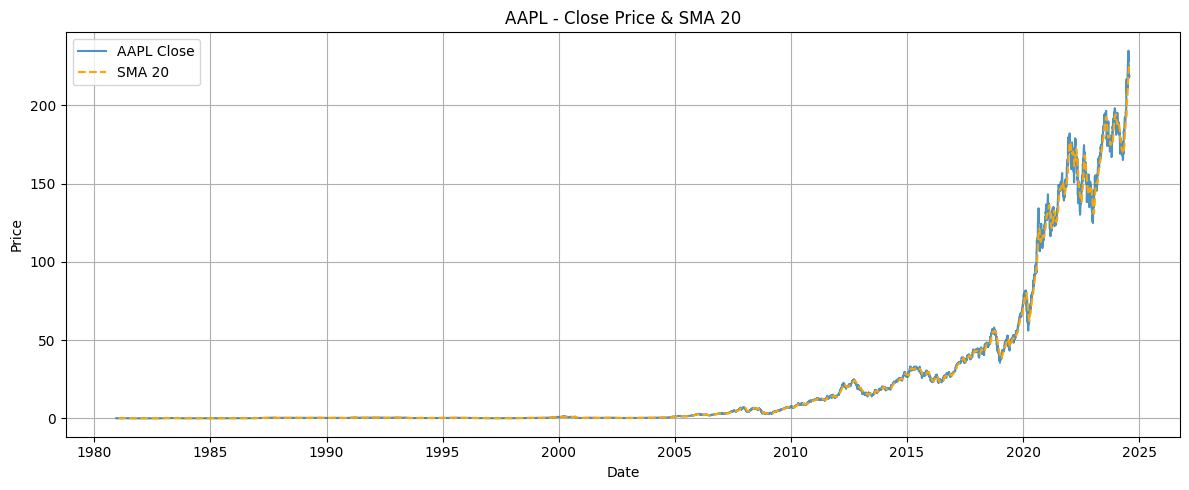

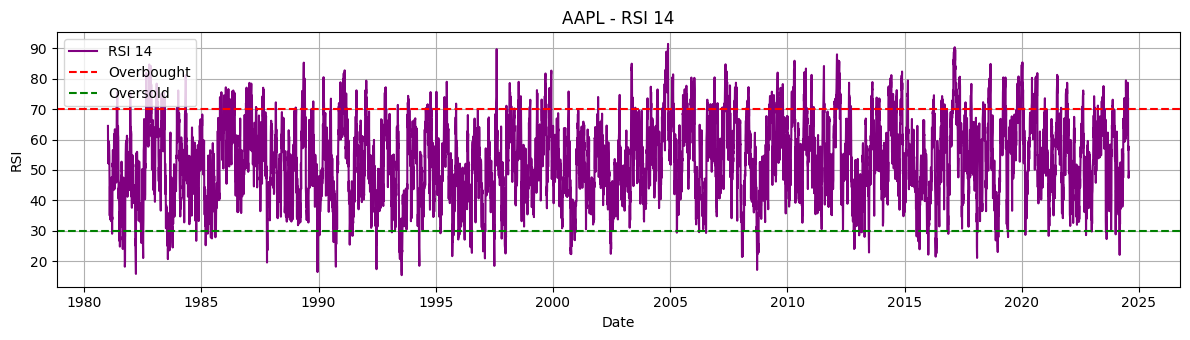

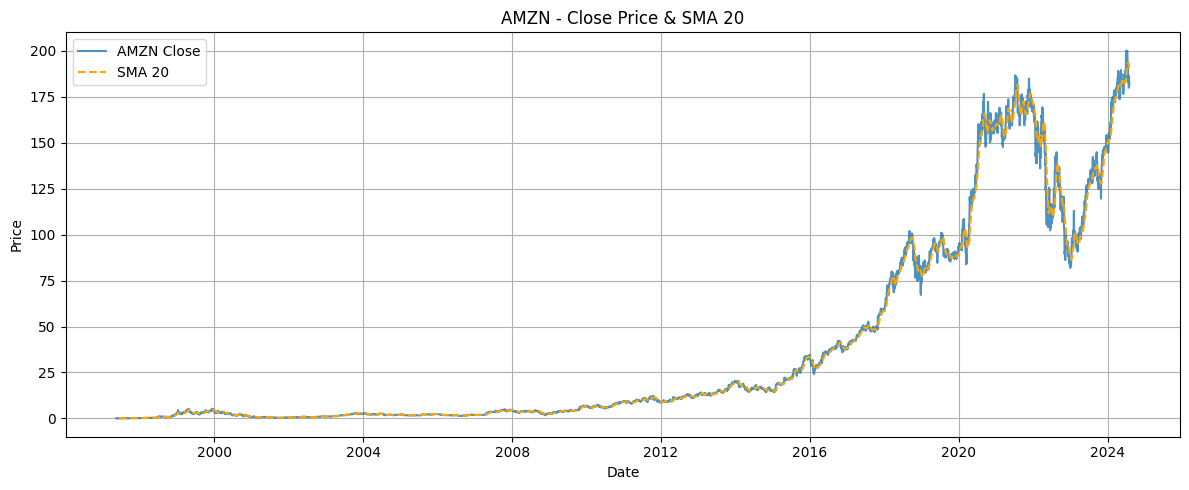

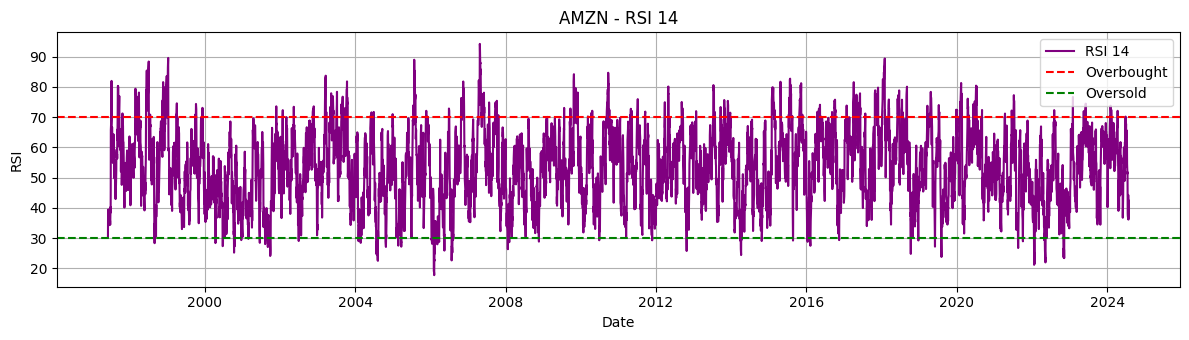

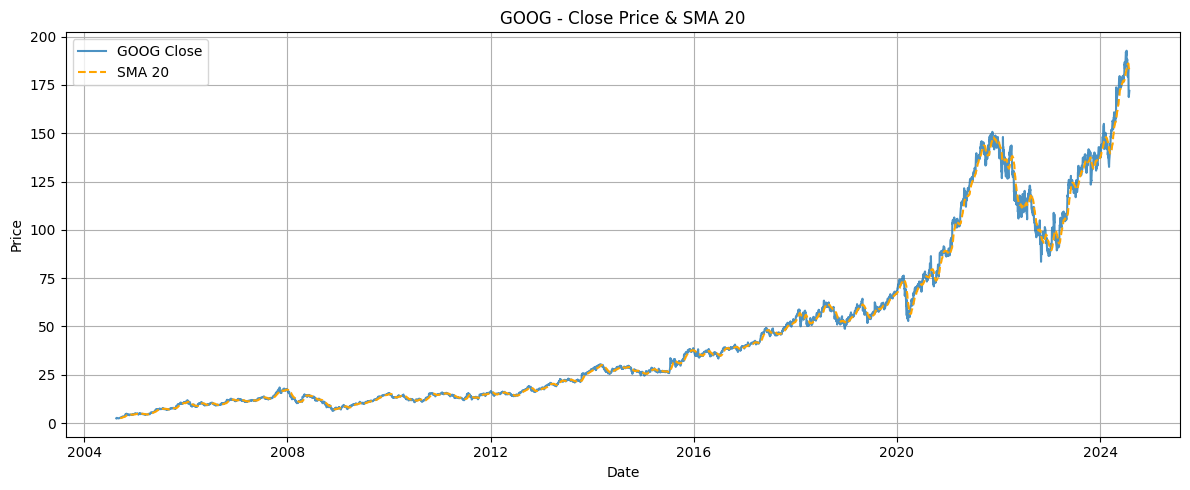

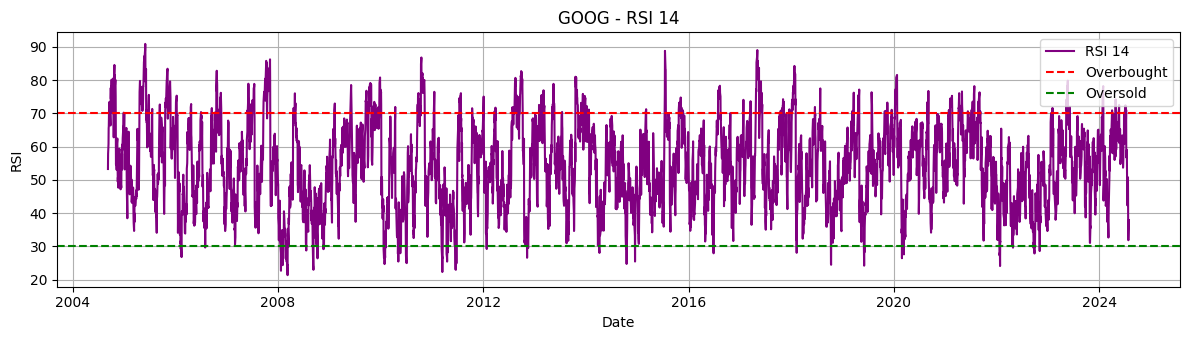

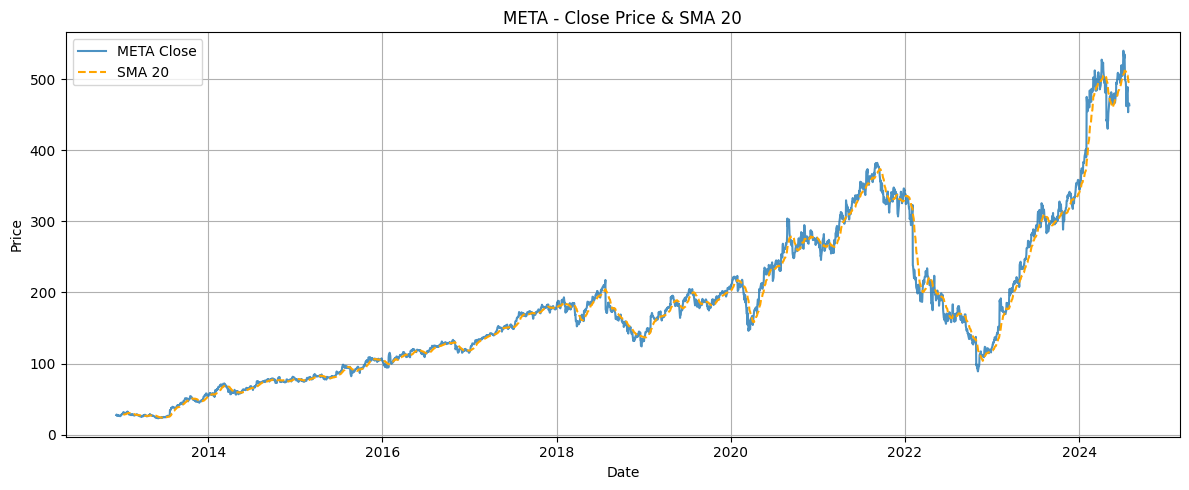

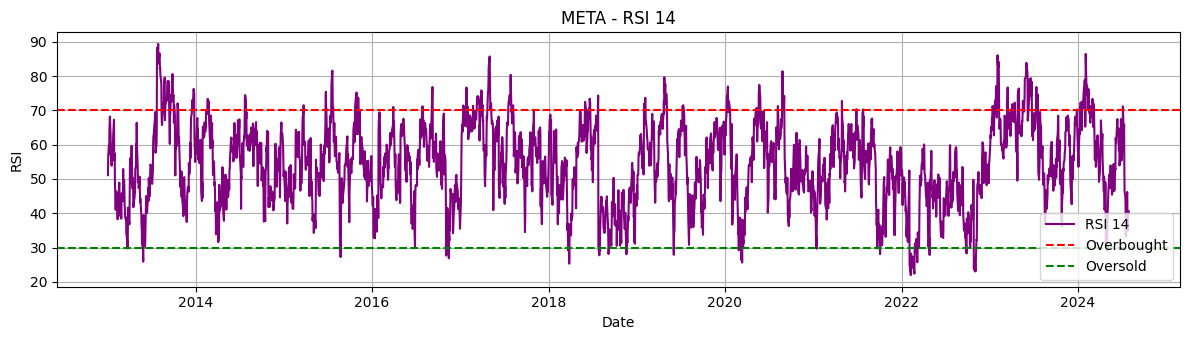

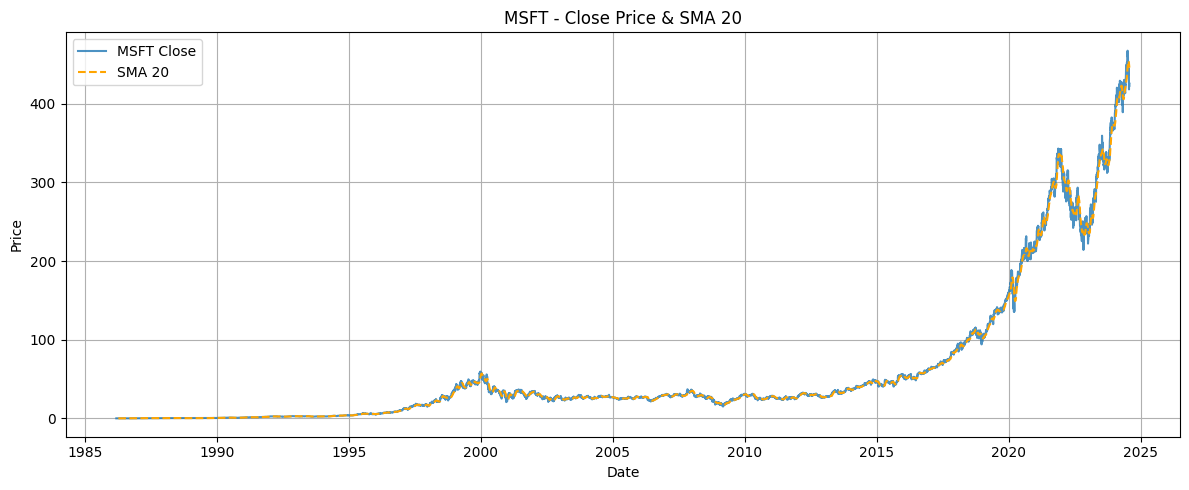

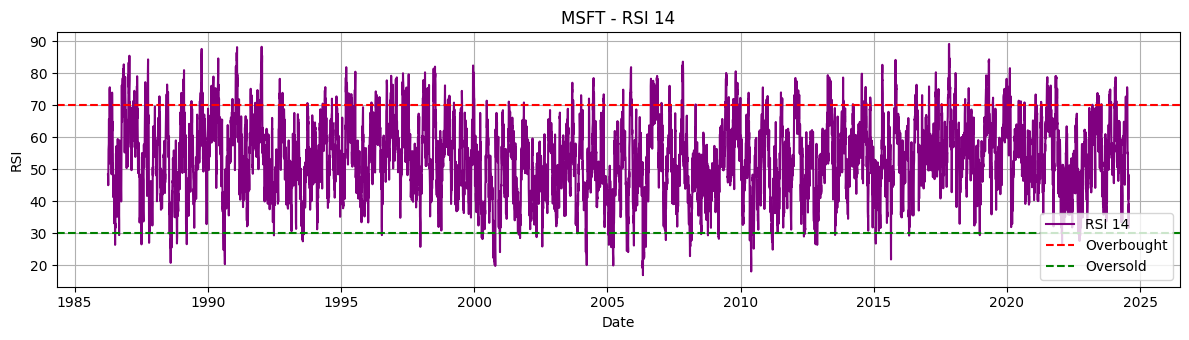

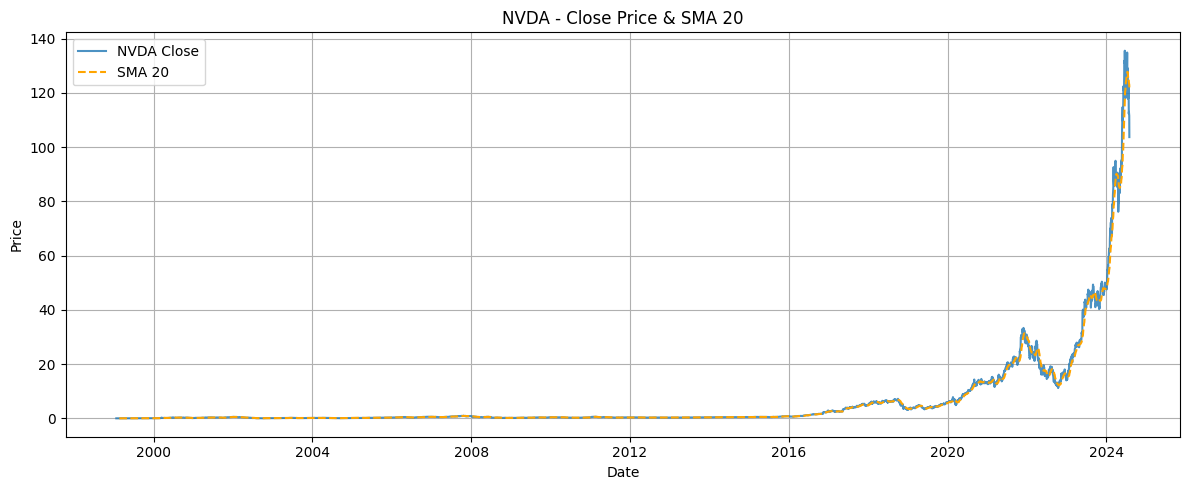

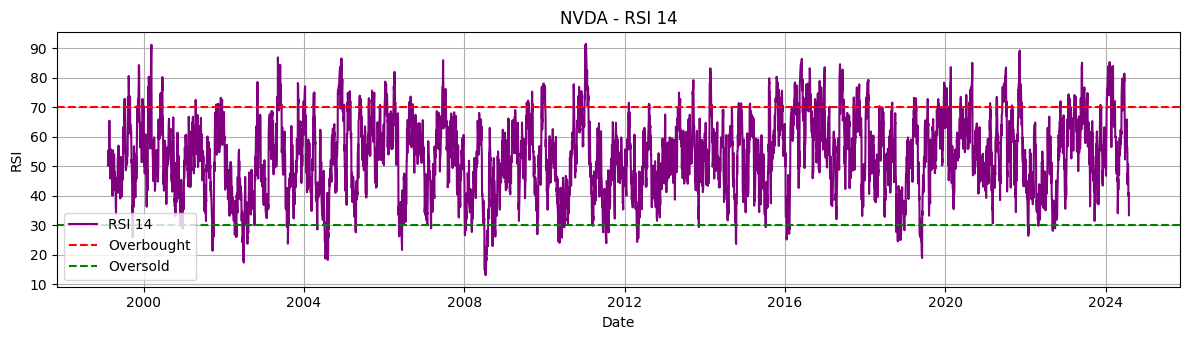

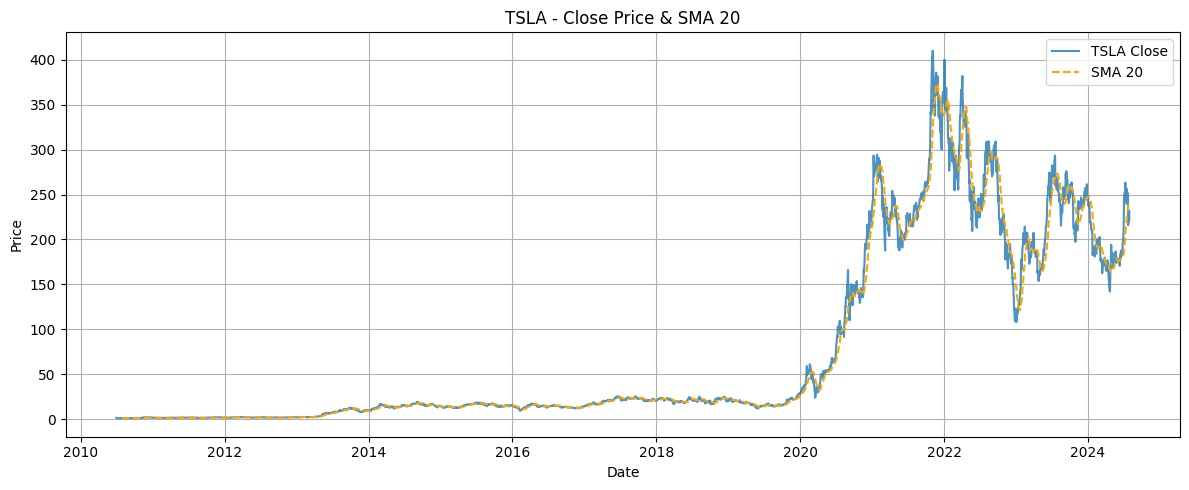

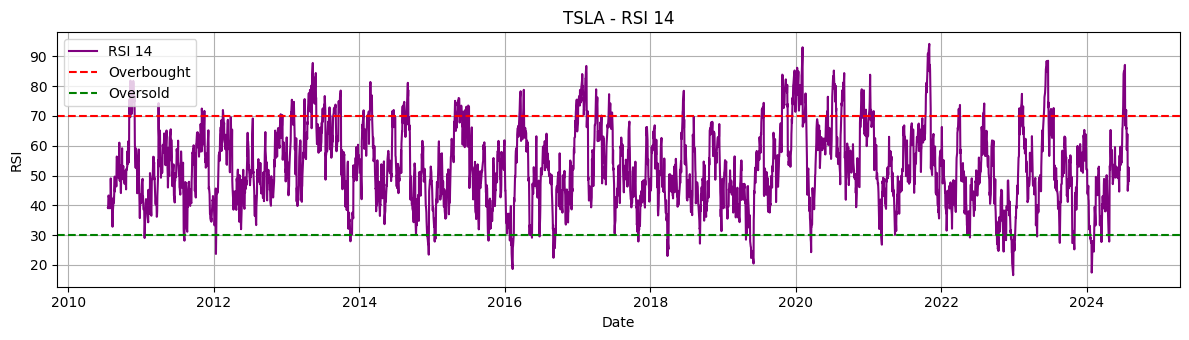

In [ ]:
DATA_PATH = "../Data/yfinance_data/yfinance_data/"

stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


stock_data = {}

for symbol in stock_symbols:
    file_path = os.path.join(DATA_PATH, f"{symbol}_historical_data.csv")
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])

    df = df.sort_values('Date')
    close = df['Close']
    df['SMA_20'] = talib.SMA(close, timeperiod=20)
    df['RSI_14'] = talib.RSI(close, timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(close)

    stock_data[symbol] = df

    plt.figure(figsize=(12, 5))
    plt.plot(df['Date'], df['Close'], label=f'{symbol} Close', alpha=0.8)
    plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--', color='orange')
    plt.title(f'{symbol} - Close Price & SMA 20')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 3.5))
    plt.plot(df['Date'], df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, linestyle='--', color='red', label='Overbought')
    plt.axhline(30, linestyle='--', color='green', label='Oversold')
    plt.title(f'{symbol} - RSI 14')
    
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
